# **GSS Project**
## Research Question 
What is the relationship between mental health and socioeconomic status?
## Summary
From the survey, we wanted to see if there was any relationship with Americans' mental health and their socioeconomic status. We chose happiness levels and depression levels to be the variables that measured mental health and chose socioeconomic index and occupational prestige to be variables that measured socioeconomic status. We graphed the distribution of each variable as well as the relationships between the variables using the packages listed below. Overall, we noticed with both occupational prestige and socioeconomic index, that as socioeconomic status was higher, happiness levels tended to be higher and depression levels tended to be lower.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('GSS.csv', low_memory=False)
print(df.shape)
df.head()


(72390, 23)


,year,id_,wrkstat,hrs2,wrkslf,industry,occ10,age,educ,happy,...,ballot,prestg10,sei10,hlthdep,hlthconf,hlthnot,feelnerv,worry,feeldown,nointerest
0,1972,1,Working full time,.i: Inapplicable,Someone else,Department and mail order establishments,"Wholesale and retail buyers, except farm products",23,16,Not too happy,...,.i: Inapplicable,45,50.0,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
1,1972,2,Retired,.i: Inapplicable,Someone else,Newspaper publishing and printing,First-line supervisors of production and opera...,70,10,Not too happy,...,.i: Inapplicable,50,46.5,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
2,1972,3,Working part time,.i: Inapplicable,Someone else,"Real estate, incl. real estate-insurance-law o...",Real estate brokers and sales agents,48,12,Pretty happy,...,.i: Inapplicable,49,56.9,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
3,1972,4,Working full time,.i: Inapplicable,Someone else,Apparel and accessories,Accountants and auditors,27,17,Not too happy,...,.i: Inapplicable,60,76.3,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
4,1972,5,Keeping house,.i: Inapplicable,Someone else,Telephone (wire and radio),Telephone operators,61,12,Pretty happy,...,.i: Inapplicable,31,31.9,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable


In [9]:
print("Column names:", df.columns.tolist())

Column names: ['year', 'id_', 'wrkstat', 'hrs2', 'wrkslf', 'industry', 'occ10', 'age', 'educ', 'happy', 'satjob', 'satfin', 'trauma5', 'ballot', 'prestg10', 'sei10', 'hlthdep', 'hlthconf', 'hlthnot', 'feelnerv', 'worry', 'feeldown', 'nointerest']


## Results
### Overview of Variables
To measure socioeconomic status we used the socioeconomic index and occupational prestige variables. meanwhile, to measure mental health we used the happiness level and depression level variables.

In [10]:
var = 'sei10'
# print(df[var].unique(),'\n')
df[var] = df[var].replace(-100., np.nan)
df[var] = pd.to_numeric(df[var], errors='coerce')
print(df[var].unique(),'\n')

[50.  46.5 56.9 76.3 31.9 62.  36.2 32.  13.6 12.6 12.4 29.5 39.9 36.4
 41.1 82.5  nan 59.1 60.4 38.8 80.9 14.8 39.7 38.1 21.  28.4 27.7 84.2
 50.4 32.7 84.5 24.6 74.6 28.7 19.7 23.  31.1 42.8 20.8 25.  35.8 18.6
 14.  26.8 13.2 52.4 38.3 35.1 29.2 19.6 37.3 19.2 81.9 87.6 65.3 24.2
 39.1 69.3 43.  26.2 23.2 25.2 60.1 24.1 62.6 20.7 22.9 62.7 53.5 45.4
 48.8 48.1 31.  45.3 39.6 80.7 77.4 21.6 23.3 27.  71.6 72.7 76.7 75.5
 52.  43.8 37.6 58.4 15.8 27.2 21.8 73.9 68.  29.7  9.  92.1 50.3 34.1
 59.8 67.7 65.1 18.8 31.6 25.1 23.7 48.3 73.6 49.6 62.4 35.2 22.4 86.5
 57.1 17.5 37.7 24.  57.8 67.8 20.9 11.8 46.  34.7 27.5 53.8 23.8 41.
 21.4 41.8 46.6 26.1 31.2 32.6 28.6 35.3 58.1 65.2 12.7 26.5 52.1 81.6
 37.2 66.4 31.5 20.5 83.8 14.4 54.6 81.  14.6 89.9 47.9 38.2 22.1 49.4
 42.9 57.4 85.2 60.5 20.3 25.7 62.9 36.5 44.9 63.7 20.  28.3 10.6 77.2
 53.6 17.1 91.9 56.8 71.7 71.  91.1 64.9 61.4 27.1 26.6 29.9 70.3 69.4
 39.2 87.9 37.4 73.4 64.2 40.1 45.  89.3 30.3 19.  33.7 31.3 13.3 37.
 84.  61

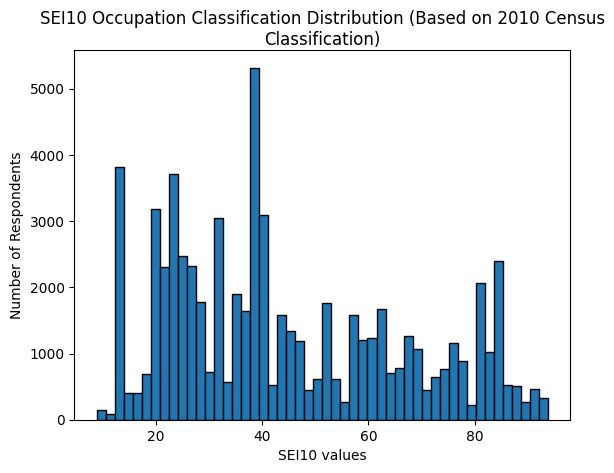

In [53]:
df['sei10'].hist(grid=False, edgecolor='Black', bins=50)

plt.title('SEI10 Occupation Classification Distribution (Based on 2010 Census Classification)', wrap=True)

plt.xlabel('SEI10 values')
plt.ylabel('Number of Respondents')

plt.show()

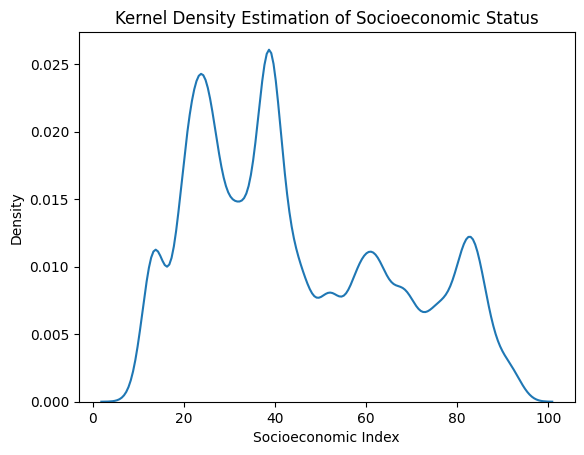

In [46]:
sns.kdeplot(x='sei10', data=df).set(xlabel='Socioeconomic Index')

plt.title('Kernel Density Estimation of Socioeconomic Status', wrap=True)

plt.show()

The distribution of socioecoomic index is mostly congregated around the 20-40 index level, meaning most survey participants were middle-to-lower socioeconomic status. There are clear peaks around the 20 mark and the 40 mark and then smaller peaks around 60 and 80.

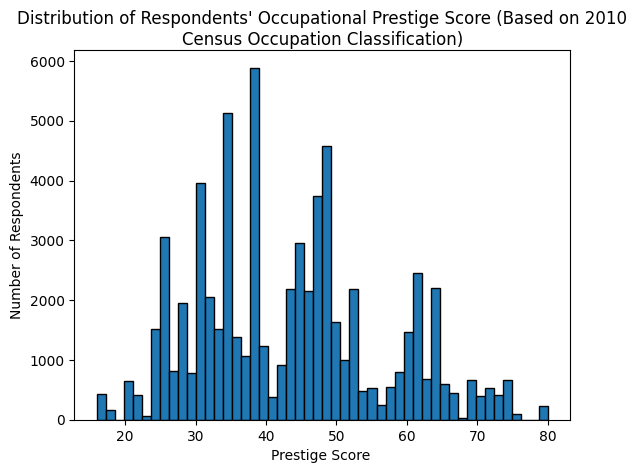

In [17]:
df['prestg10'].hist(grid=False, edgecolor='Black', bins=50)

plt.title('Distribution of Respondents\' Occupational Prestige Score (Based on 2010 Census Occupation Classification)', wrap=True)

plt.xlabel('Prestige Score ')
plt.ylabel('Number of Respondents')

plt.show()

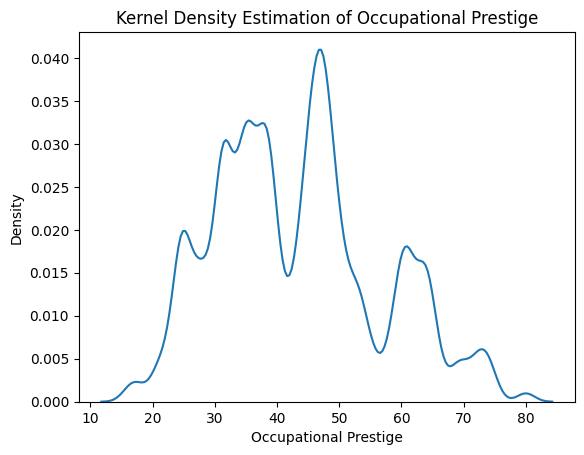

In [51]:
sns.kdeplot(x='prestg10', data=df).set(xlabel='Occupational Prestige')

plt.title('Kernel Density Estimation of Occupational Prestige', wrap=True)

plt.show()

Occupational prestige largely centered around the 30-50 levels with peaks at around the 25 mark, 30-40 mark, 50 mark, and 60 mark. This shows that most of the participants had occupations with medium-level of prestige.

[Text(0.5, 1.0, 'Socioeconomic Status vs Occupational Prestige'),
 Text(0.5, 0, 'Socioeconomic Index'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

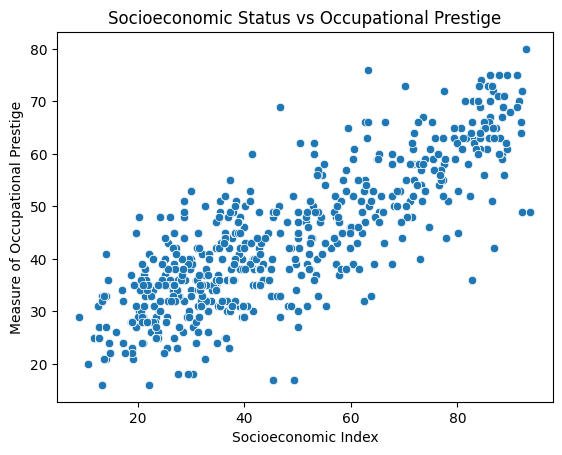

In [18]:
sns.scatterplot(x=df['sei10'],y=df['prestg10']).set(title="Socioeconomic Status vs Occupational Prestige",xlabel='Socioeconomic Index',ylabel='Measure of Occupational Prestige')

There is a strong, positive correlation between socioeconomic index and occupational prestige.

In [12]:
var = 'hlthdep'
print(df[var].unique(),'\n')
df[var] = df[var].replace('.i:  Inapplicable', np.nan)
df[var] = df[var].replace('.n:  No answer', np.nan)
df[var] = df[var].replace('.s:  Skipped on Web', np.nan)
df[var] = df[var].replace('.d:  Do not Know/Cannot Choose', np.nan)
print(df[var].unique(),'\n')

['.i:  Inapplicable' 'Often' 'Seldom' 'Never' 'Sometimes'
 '.s:  Skipped on Web' 'Very often' '.d:  Do not Know/Cannot Choose'
 '.n:  No answer'] 

[nan 'Often' 'Seldom' 'Never' 'Sometimes' 'Very often'] 



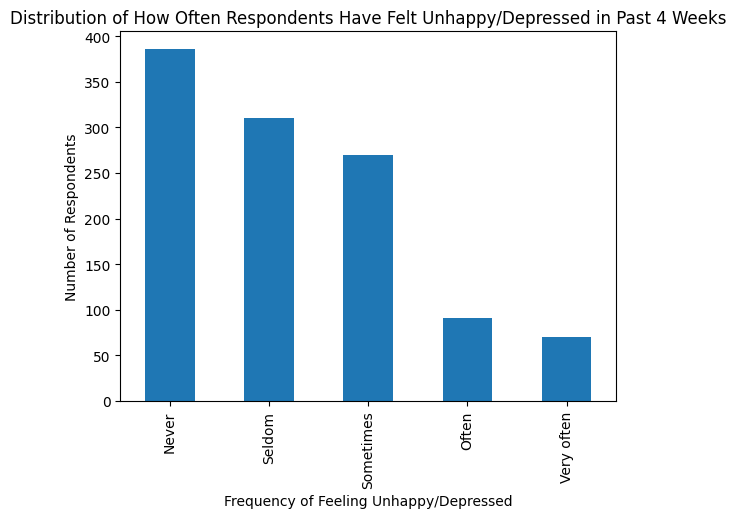

In [13]:
category_order = ['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']
df['hlthdep'].value_counts().loc[category_order].plot.bar()

plt.title('Distribution of How Often Respondents Have Felt Unhappy/Depressed in Past 4 Weeks')

plt.xlabel('Frequency of Feeling Unhappy/Depressed')
plt.ylabel('Number of Respondents')

plt.show()

In [14]:
# cleaned happiness
var = 'happy'
print(df[var].unique(),'\n')
df[var] = df[var].replace('.i:  Inapplicable', np.nan)
df[var] = df[var].replace('.n:  No answer', np.nan)
df[var] = df[var].replace('.s:  Skipped on Web', np.nan)
df[var] = df[var].replace('.d:  Do not Know/Cannot Choose', np.nan)
print(df[var].unique(),'\n')

['Not too happy' 'Pretty happy' 'Very happy' '.n:  No answer'
 '.d:  Do not Know/Cannot Choose' '.i:  Inapplicable'
 '.s:  Skipped on Web'] 

['Not too happy' 'Pretty happy' 'Very happy' nan] 



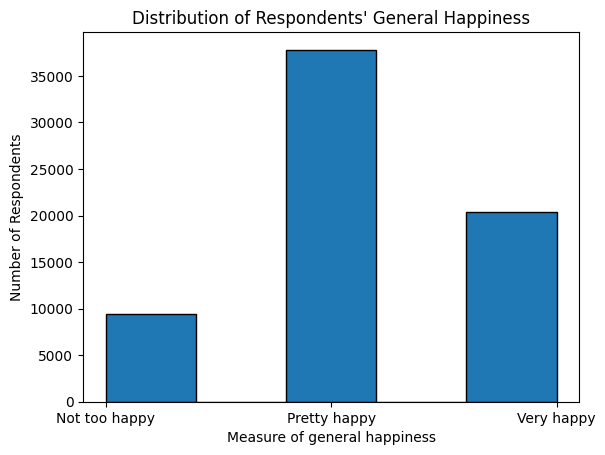

In [15]:
df['happy'].hist(bins=5, grid=False, edgecolor='Black')

plt.title('Distribution of Respondents\' General Happiness')

plt.xlabel('Measure of general happiness')
plt.ylabel('Number of Respondents')

plt.show()


In [16]:
# cleaned prestige associated with the respondent's occupation
var = 'prestg10'
print(df[var].unique(),'\n')
df[var] = df[var].replace('.i:  Inapplicable', np.nan)
df[var] = pd.to_numeric(df[var], errors='coerce')
print(df[var].unique(),'\n')


['45' '50' '49' '60' '31' '43' '33' '25' '29' '51' '64'
 '.i:  Inapplicable' '53' '59' '35' '47' '61' '22' '39' '24' '38' '62'
 '32' '46' '74' '27' '36' '44' '28' '37' '30' '58' '71' '48' '66' '40'
 '42' '17' '65' '72' '55' '52' '56' '26' '41' '34' '67' '73' '21' '57'
 '69' '63' '70' '68' '16' '54' '20' '75' '18' '80' '23' '76'] 

[45. 50. 49. 60. 31. 43. 33. 25. 29. 51. 64. nan 53. 59. 35. 47. 61. 22.
 39. 24. 38. 62. 32. 46. 74. 27. 36. 44. 28. 37. 30. 58. 71. 48. 66. 40.
 42. 17. 65. 72. 55. 52. 56. 26. 41. 34. 67. 73. 21. 57. 69. 63. 70. 68.
 16. 54. 20. 75. 18. 80. 23. 76.] 



[Text(0.5, 1.0, "Occupational Prestige vs Respondent's Level of Hapiness"),
 Text(0.5, 0, 'Happiness Level'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

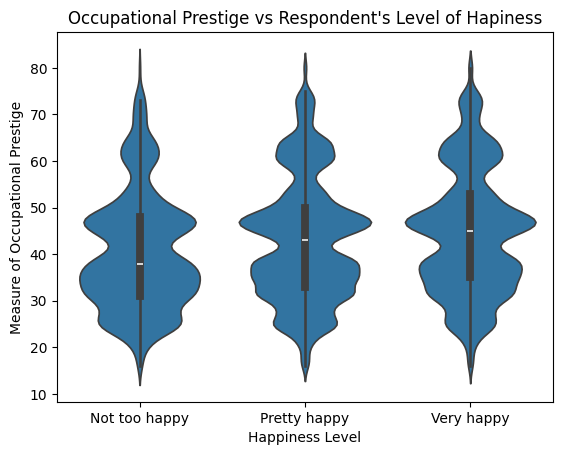

In [20]:
sns.violinplot(x='happy',y='prestg10',data=df).set(title="Occupational Prestige vs Respondent's Level of Hapiness",xlabel='Happiness Level',ylabel='Measure of Occupational Prestige')

[Text(0.5, 1.0, "Occupational Prestige vs Respondent's Frequency of Depression"),
 Text(0.5, 0, 'Depression Frequency'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

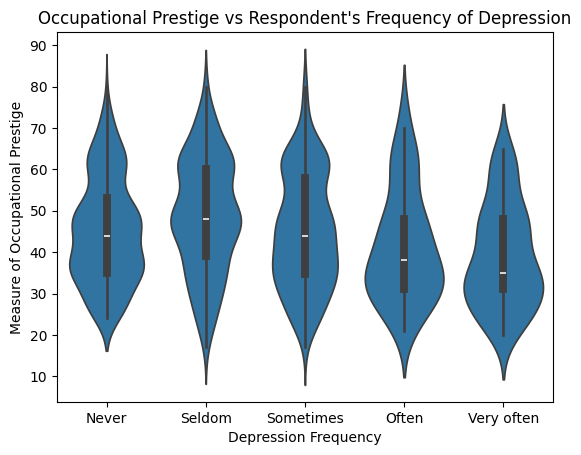

In [21]:
sns.violinplot(x='hlthdep',y='prestg10',data=df, order=['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']).set(title="Occupational Prestige vs Respondent's Frequency of Depression",xlabel='Depression Frequency',ylabel='Measure of Occupational Prestige')

[Text(0.5, 1.0, "Socioeconomic Status vs Respondent's Level of Hapiness"),
 Text(0.5, 0, 'Happiness Level'),
 Text(0, 0.5, 'Socioeconomic Index')]

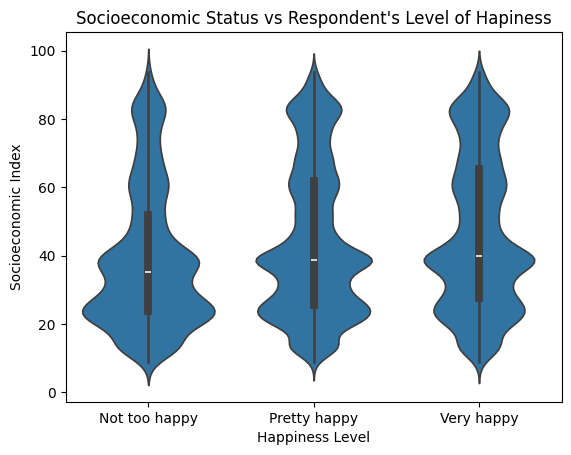

In [22]:
sns.violinplot(x='happy',y='sei10',data=df).set(title="Socioeconomic Status vs Respondent's Level of Hapiness",xlabel='Happiness Level',ylabel='Socioeconomic Index')

[Text(0.5, 1.0, "Socioeconomic Status vs Respondent's Frequency of Depression"),
 Text(0.5, 0, 'Depression Frequency'),
 Text(0, 0.5, 'Socioeconomic Index')]

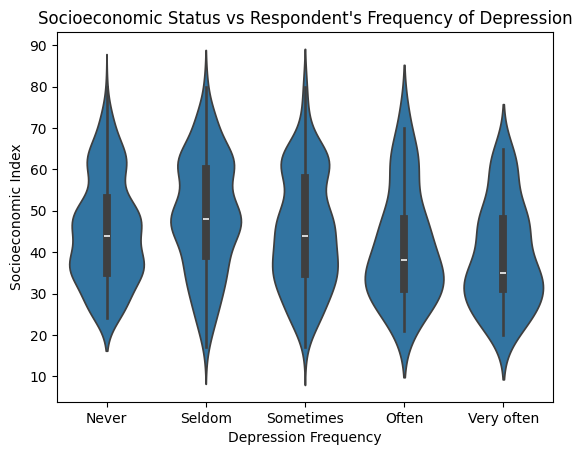

In [23]:
sns.violinplot(x='hlthdep',y='prestg10',data=df, order=['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']).set(title="Socioeconomic Status vs Respondent's Frequency of Depression",xlabel='Depression Frequency',ylabel='Socioeconomic Index')

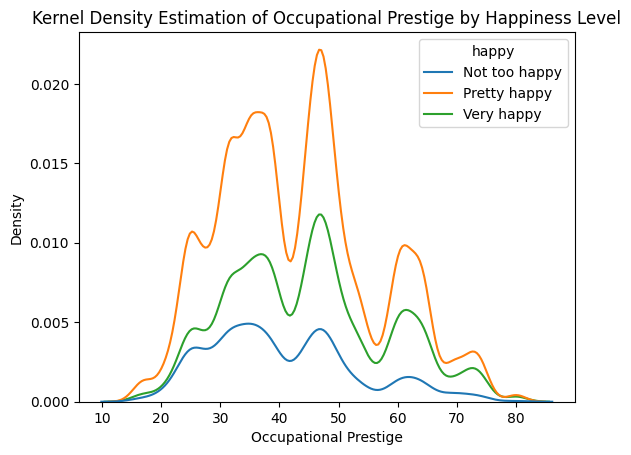

In [47]:
sns.kdeplot(x='prestg10', data=df, hue="happy").set(xlabel='Occupational Prestige')

plt.title('Kernel Density Estimation of Occupational Prestige by Happiness Level', wrap=True)

plt.show()

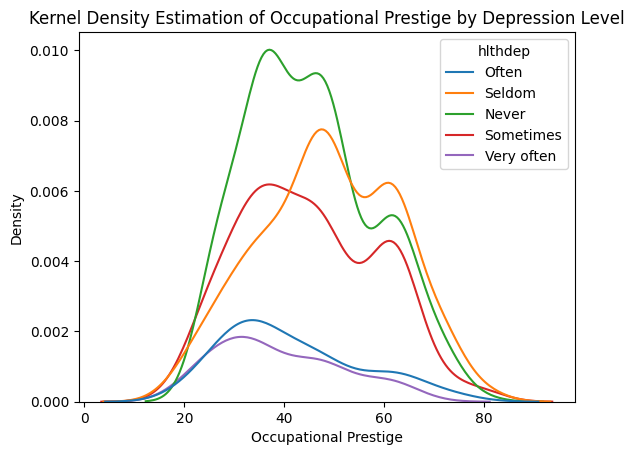

In [48]:
sns.kdeplot(x='prestg10', data=df, hue="hlthdep").set(xlabel='Occupational Prestige')

plt.title('Kernel Density Estimation of Occupational Prestige by Depression Level', wrap=True)

plt.show()

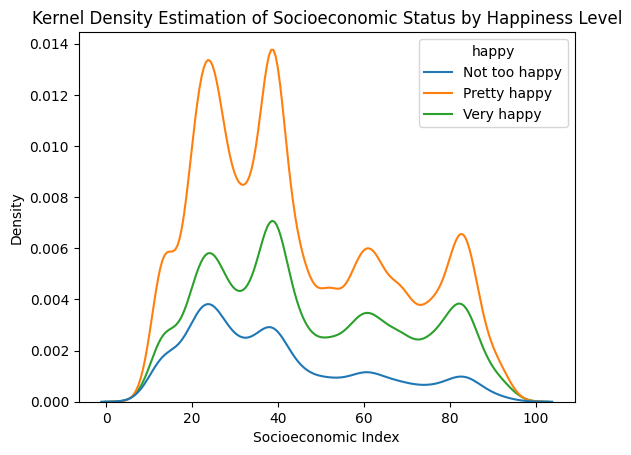

In [49]:
sns.kdeplot(x='sei10', data=df, hue="happy").set(xlabel='Socioeconomic Index')

plt.title('Kernel Density Estimation of Socioeconomic Status by Happiness Level', wrap=True)

plt.show()

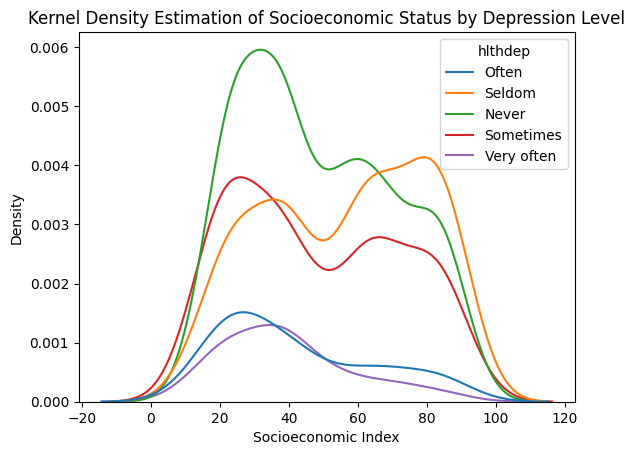

In [50]:
sns.kdeplot(x='sei10', data=df, hue="hlthdep").set(xlabel='Socioeconomic Index')

plt.title('Kernel Density Estimation of Socioeconomic Status by Depression Level', wrap=True)

plt.show()

[Text(0.5, 1.0, "Occupational Prestige vs Respondent's Level of Hapiness"),
 Text(0.5, 0, 'Happiness Level'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

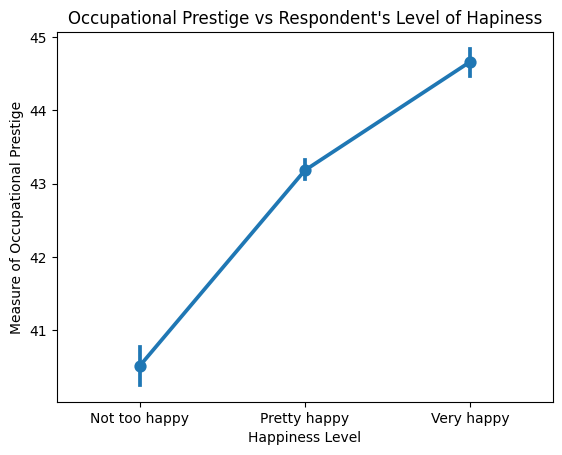

In [24]:
sns.pointplot(x='happy',y='prestg10',data=df).set(title="Occupational Prestige vs Respondent's Level of Hapiness",xlabel='Happiness Level',ylabel='Measure of Occupational Prestige')

[Text(0.5, 1.0, "Occupational Prestige vs Respondent's Frequency of Depression"),
 Text(0.5, 0, 'Depression Frequency'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

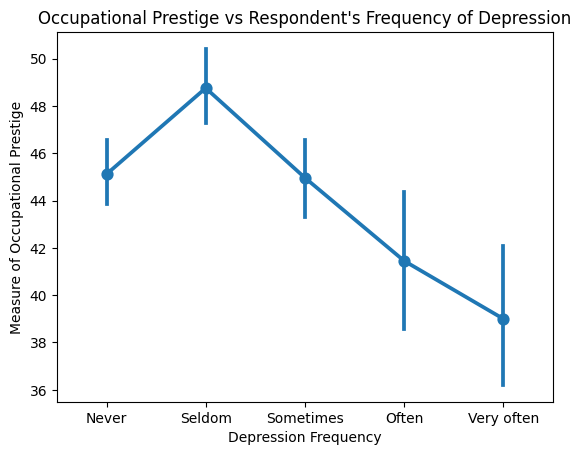

In [25]:
sns.pointplot(x='hlthdep',y='prestg10',data=df, order=['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']).set(title="Occupational Prestige vs Respondent's Frequency of Depression",xlabel='Depression Frequency',ylabel='Measure of Occupational Prestige')

[Text(0.5, 1.0, "Socioeconomic Status vs Respondent's Level of Hapiness"),
 Text(0.5, 0, 'Happiness Level'),
 Text(0, 0.5, 'Socioeconomic Index')]

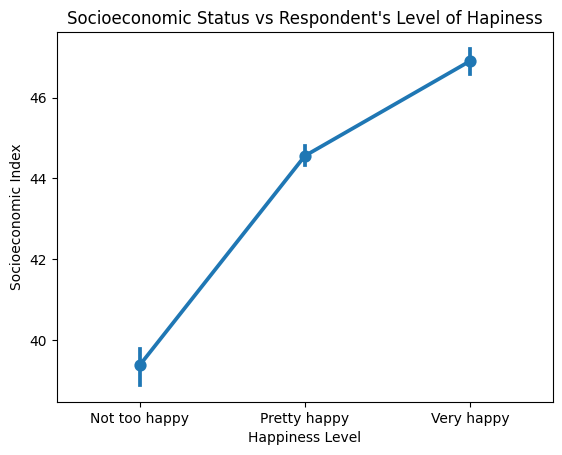

In [26]:
sns.pointplot(x='happy',y='sei10',data=df).set(title="Socioeconomic Status vs Respondent's Level of Hapiness",xlabel='Happiness Level',ylabel='Socioeconomic Index')

[Text(0.5, 1.0, "Socioeconomic Status vs Respondent's Frequency of Depression"),
 Text(0.5, 0, 'Depression Frequency'),
 Text(0, 0.5, 'Socioeconomic Index')]

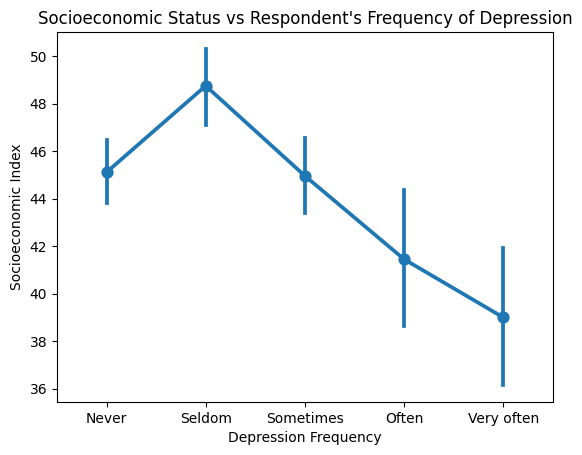

In [27]:
sns.pointplot(x='hlthdep',y='prestg10',data=df, order=['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']).set(title="Socioeconomic Status vs Respondent's Frequency of Depression",xlabel='Depression Frequency',ylabel='Socioeconomic Index')

[Text(0.5, 1.0, "Occupational Prestige vs Respondent's Level of Hapiness"),
 Text(0.5, 0, 'Happiness Level'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

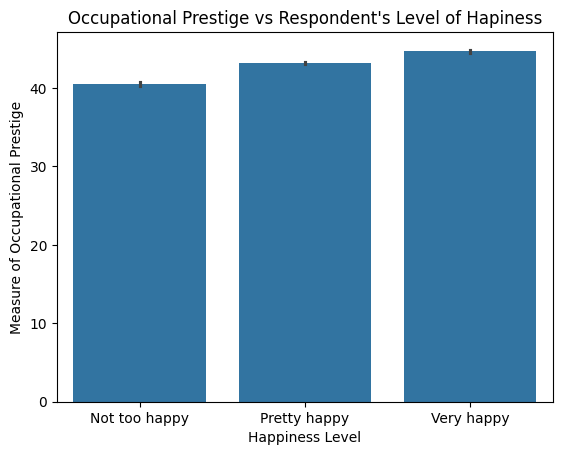

In [28]:
sns.barplot(x='happy',y='prestg10',data=df).set(title="Occupational Prestige vs Respondent's Level of Hapiness",xlabel='Happiness Level',ylabel='Measure of Occupational Prestige')

[Text(0.5, 1.0, "Occupational Prestige vs Respondent's Frequency of Depression"),
 Text(0.5, 0, 'Depression Frequency'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

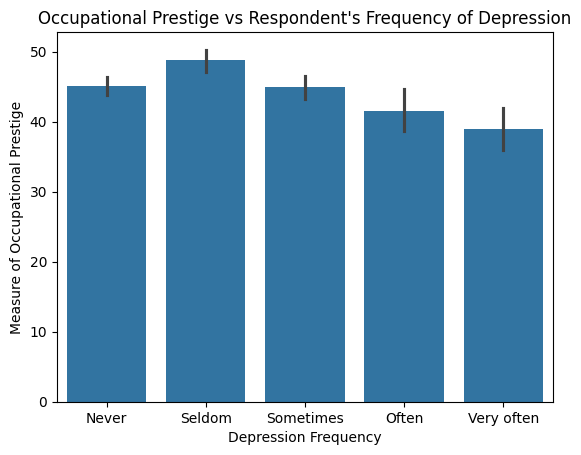

In [29]:
sns.barplot(x='hlthdep',y='prestg10',data=df, order=['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']).set(title="Occupational Prestige vs Respondent's Frequency of Depression",xlabel='Depression Frequency',ylabel='Measure of Occupational Prestige')

[Text(0.5, 1.0, "Socioeconomic Status vs Respondent's Level of Hapiness"),
 Text(0.5, 0, 'Happiness Level'),
 Text(0, 0.5, 'Socioeconomic Index')]

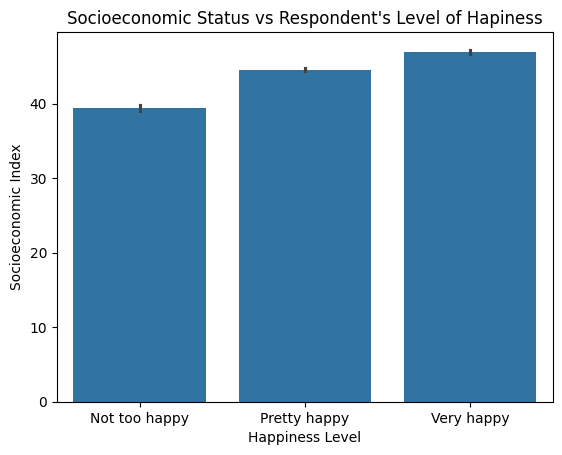

In [30]:
sns.barplot(x='happy',y='sei10',data=df).set(title="Socioeconomic Status vs Respondent's Level of Hapiness",xlabel='Happiness Level',ylabel='Socioeconomic Index')

[Text(0.5, 1.0, "Socioeconomic Status vs Respondent's Frequency of Depression"),
 Text(0.5, 0, 'Depression Frequency'),
 Text(0, 0.5, 'Socioeconomic Index')]

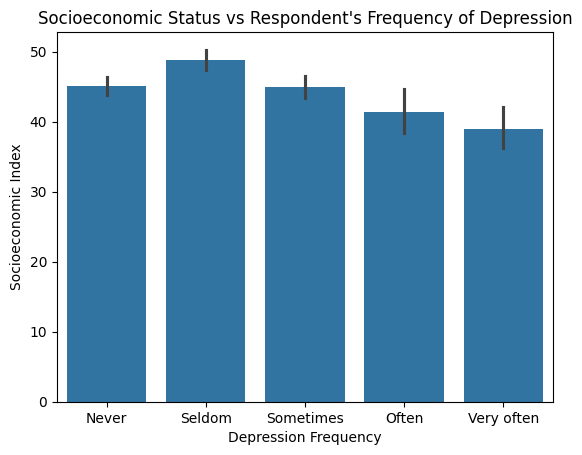

In [31]:
sns.barplot(x='hlthdep',y='prestg10',data=df, order=['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']).set(title="Socioeconomic Status vs Respondent's Frequency of Depression",xlabel='Depression Frequency',ylabel='Socioeconomic Index')

### Conclusion
Overall, we found that those with higher socioeconomic status in terms of occupational prestige and socioeconomic index tended to have higher levels of happiness and lower leves of depression. This result seems reasonable because those who have higher status likely have more resources to improve their mental health. 

Add information defending it from criticism and suggest additional work that was outside the scope of the project(???). Also need to talk about our research strategy and whether it succeeded or failed (what is a research strategy...)